In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.chdir("../")

In [3]:
df = pd.read_csv('Data/raw_analyst_ratings.csv')

In [ ]:
# Calculate headline lengths
from scripts.Calculate_basic_statistics import analyze_headline_lengths
stats = analyze_headline_lengths(df)


In [ ]:
# Count articles per publisher
from scripts.articles_per_publisher import count_articles_per_publisher
count_articles_per_publisher(df)

In [ ]:
# Convert date to datetime
from scripts.Analyze_publication_dates import analyze_publication_dates
analyze_publication_dates(df)


In [ ]:
from scripts.test import analyze_sentiment

df = analyze_sentiment(df)


In [4]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
sid = SentimentIntensityAnalyzer()

In [6]:
df['sentiment_score'] = df['headline'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [7]:
def classify_sentiment(score):
    if score > 0.5:
        return 'positive'
    elif score < -0.0001:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

In [8]:
print(df[['headline', 'sentiment_score', 'sentiment']])

                                                  headline  sentiment_score  \
0                  Stocks That Hit 52-Week Highs On Friday           0.0000   
1               Stocks That Hit 52-Week Highs On Wednesday           0.0000   
2                            71 Biggest Movers From Friday           0.0000   
3             46 Stocks Moving In Friday's Mid-Day Session           0.0000   
4        B of A Securities Maintains Neutral on Agilent...           0.2960   
...                                                    ...              ...   
1407323             Top Narrow Based Indexes For August 29           0.2023   
1407324  Recap: Wednesday's Top Percentage Gainers and ...          -0.3818   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...           0.0000   
1407326  Oppenheimer Initiates China Zenix At Outperfor...           0.0000   
1407327  China Zenix Auto International Opens For Tradi...           0.0000   

        sentiment  
0         neutral  
1         n

In [9]:
import matplotlib.pyplot as plt


In [10]:
# Calculate sentiment frequency
sentiment_counts = df['sentiment'].value_counts()

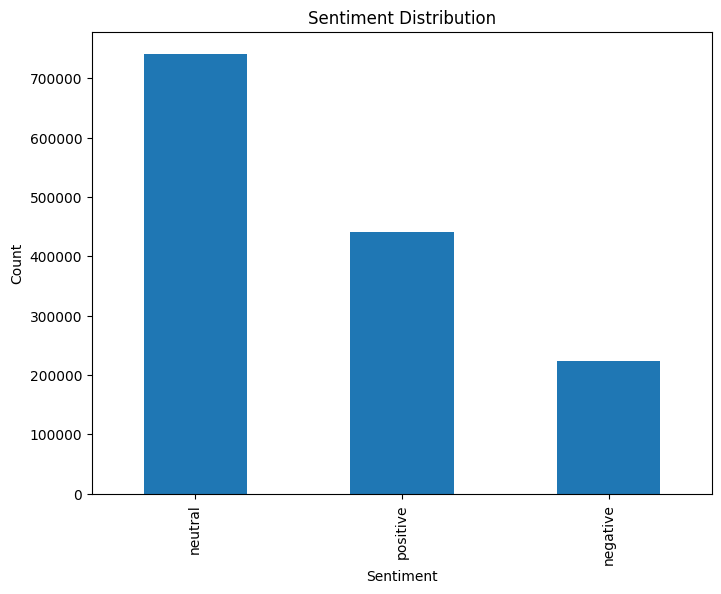

In [11]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()